<a href="https://colab.research.google.com/github/truongkhng/AI-Projects/blob/main/Emotions_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#LINK https://drive.google.com/drive/folders/1-Cs0pF3JZ4yrdq66bZyBX5GgOLP8OHp3?usp=sharing

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [31]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      #print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        #print("File=", file)
        pictures.append(cv2.resize(cv2.imread((raw_folder + "/" + folder + "/" + file)
        ,cv2.IMREAD_COLOR),dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

In [32]:
raw_folder = "/content/drive/MyDrive/Emotions"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'emotions.txt')
dataset_path = "emotions.txt"
x_data,y_data = load_data(dataset_path= 'emotions.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)

In [33]:
print(x_train.shape)
print(y_train.shape)


(1056, 150, 150, 3)
(1056, 4)


In [34]:
x_test_original = x_test;
y_test_original = y_test;
x_label = ['Angry','Happy','Sad','Surprise']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
model = Sequential()
model.add (Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(4,activation='softmax'))
model.summary()

In [39]:
checkpoint = ModelCheckpoint(filepath= "Emotions-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=500,batch_size = 32,validation_data=(x_test,y_test),verbose=1,callbacks=callbacks_list)

Epoch 1/500
33/33 [==============================] - ETA: 0s - loss: 2.0902 - accuracy: 0.3239
Epoch 1: val_accuracy improved from -inf to 0.24621, saving model to Emotions-weights-01-0.2462.h5
33/33 [==============================] - 56s 107ms/step - loss: 2.0902 - accuracy: 0.3239 - val_loss: 1.5157 - val_accuracy: 0.2462
Epoch 2/500
33/33 [==============================] - ETA: 0s - loss: 1.3159 - accuracy: 0.4119
Epoch 2: val_accuracy improved from 0.24621 to 0.28030, saving model to Emotions-weights-02-0.2803.h5
33/33 [==============================] - 3s 90ms/step - loss: 1.3159 - accuracy: 0.4119 - val_loss: 1.7378 - val_accuracy: 0.2803
Epoch 3/500
33/33 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.4223
Epoch 3: val_accuracy improved from 0.28030 to 0.31061, saving model to Emotions-weights-03-0.3106.h5
33/33 [==============================] - 3s 90ms/step - loss: 1.2287 - accuracy: 0.4223 - val_loss: 1.7710 - val_accuracy: 0.3106
Epoch 4/500
33/33 [=

In [40]:
model_json = model.to_json()
with open('Emotions_config.json', 'w') as json_file:
    json_file.write(model_json)

picture  141
actual: [0 0 0 1]
predictions: [3]
predictions label: Surprise


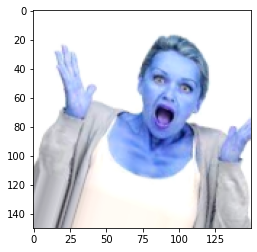

In [53]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

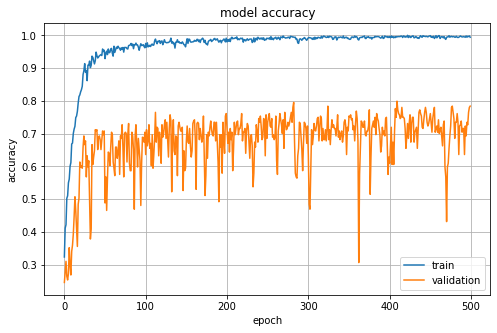

In [48]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()